<a href="https://colab.research.google.com/github/Bahrombekk/OpenCV/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22Copy_of_shape_detection_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import numpy as np 
import cv2
import matplotlib.pyplot as plt

In [39]:
!wget https://raw.githubusercontent.com/Murodjon002/ComputerVision/master/shape%20detection/00_primitive_shapes_different_colors.png
!wget https://raw.githubusercontent.com/Murodjon002/ComputerVision/master/shape%20detection/01_primitive_shapes_red.png
!wget https://raw.githubusercontent.com/Murodjon002/ComputerVision/master/shape%20detection/02_primitive_shapes_angle.png
!wget https://raw.githubusercontent.com/Murodjon002/ComputerVision/master/shape%20detection/03_shapes.png

--2023-05-19 13:46:30--  https://raw.githubusercontent.com/Murodjon002/ComputerVision/master/shape%20detection/00_primitive_shapes_different_colors.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4972 (4.9K) [image/png]
Saving to: ‘00_primitive_shapes_different_colors.png.1’

00_primitive_shapes 100%[===================>]   4.86K  --.-KB/s    in 0s      

2023-05-19 13:46:30 (61.5 MB/s) - ‘00_primitive_shapes_different_colors.png.1’ saved [4972/4972]

--2023-05-19 13:46:30--  https://raw.githubusercontent.com/Murodjon002/ComputerVision/master/shape%20detection/01_primitive_shapes_red.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.gi

In [46]:
def get_filename(name):
  img=cv2.imread(name)
  img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  gray=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
  binary = cv2.inRange(gray, 0, 200)
  return img,gray,binary
img,gray,binary=get_filename("/content/02_primitive_shapes_angle.png")

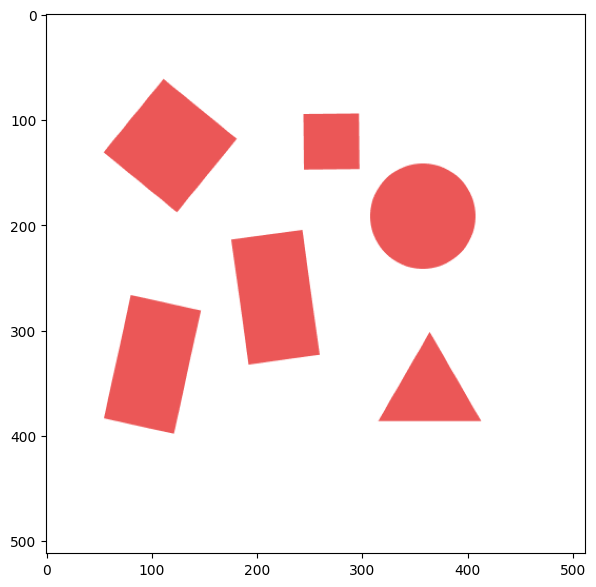

In [47]:
def show(img):
  s=7
  plt.figure(figsize=(s,s),dpi=100)
  plt.imshow(img,cmap='gray')
  # plt.axis("off")
  plt.show()
show(img)

In [48]:
def findContours(img):
  contours,heirarchy = cv2.findContours(img, cv2.RETR_EXTERNAL,	cv2.CHAIN_APPROX_SIMPLE)
  return heirarchy,contours
heirarchy,contours=findContours(binary)


In [49]:
def contourlar_sonini_topish(contours):
  l=[]
  for cnt in contours:
    l.append(int(cv2.contourArea(cnt)))
  l1=[]
  for i in l:
    l1.append(l.index(i))
  return l1
contourlar_sonini_topish(contours)


[0, 1, 2, 3, 4, 5]

[4048, 8013, 8010, 7735, 2677, 7991]


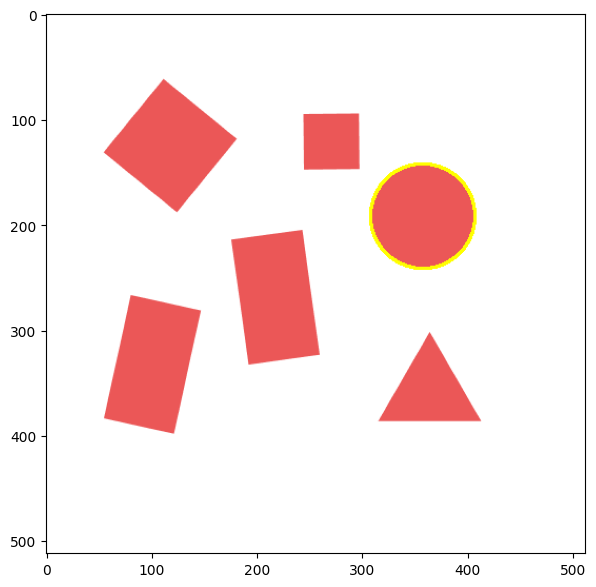

In [50]:
l=[]
for cnt in contours:
  l.append(int(cv2.contourArea(cnt)))
print(l)
img_area = cv2.drawContours(img,contours,3,(255,255,0),2)
show(img_area)

In [58]:
imageread=cv2.imread("/content/02_primitive_shapes_angle.png")
imagegray = cv2.cvtColor(imageread, cv2.COLOR_BGR2GRAY)
#using threshold() function to convert the grayscale image to binary image
_, imagethreshold = cv2.threshold(imagegray, 245, 255, cv2.THRESH_BINARY_INV)
#finding the contours in the given image using findContours() function
imagecontours, _ = cv2.findContours(imagethreshold, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
#for each of the contours detected, the shape of the contours is approximated using approxPolyDP() function and the contours are drawn in the image using drawContours() function
for count in imagecontours:
  epsilon = 0.01 * cv2.arcLength(count, True)
  approximations = cv2.approxPolyDP(count, epsilon, True)
  cv2.drawContours(imageread, [approximations], 0, (0), 3)
#the name of the detected shapes are written on the image
  i, j = approximations[0][0]
  if len(approximations) == 3:
    cv2.putText(imageread, "Triangle", (i, j), cv2.FONT_HERSHEY_COMPLEX, 1, 0, 2)
  elif len(approximations) == 4:
    cv2.putText(imageread, "Rectangle", (i, j), cv2.FONT_HERSHEY_COMPLEX, 1, 0, 2)
  elif len(approximations) == 5:
    cv2.putText(imageread, "Pentagon", (i, j), cv2.FONT_HERSHEY_COMPLEX, 1, 0, 2)
  elif 6 < len(approximations) < 15:
    cv2.putText(imageread, "Ellipse", (i, j), cv2.FONT_HERSHEY_COMPLEX, 1, 0, 2)
  else:
    cv2.putText(imageread, "Circle", (i, j), cv2.FONT_HERSHEY_COMPLEX, 1, 0, 2)
plt.imshow(imageread)

TypeError: ignored

In [57]:
for cnt in contours:
  epsilon  =0.01*cv2.arcLength(cnt,True)
  nuqta=cv2.approxPolyDP(cnt,epsilon,True)
  img_i=cv2.drawContours(img, [nuqta], 0, (0), 1)
  i, j = nuqta[0][0]
  if len(nuqta) == 3:
    cv2.putText(img_i, "Triangle", (i, j), cv2.FONT_HERSHEY_COMPLEX, 1, 0, 2)
  elif len(nuqta) == 4:
    cv2.putText(img_i, "Rectangle", (i, j), cv2.FONT_HERSHEY_COMPLEX, 1, 0, 2)
  elif len(nuqta) == 5:
    cv2.putText(img_i, "Pentagon", (i, j), cv2.FONT_HERSHEY_COMPLEX, 1, 0, 2)
  elif 6 < len(nuqta) < 15:
    cv2.putText(img_i, "Ellipse", (i, j), cv2.FONT_HERSHEY_COMPLEX, 1, 0, 2)
  else:
    cv2.putText(img_i, "Circle", (i, j), cv2.FONT_HERSHEY_COMPLEX, 1, 0, 2)

TypeError: ignored

In [52]:
for can in contours:
  len=cv2.arcLength(can,True)
  nuqta=cv2.approxPolyDP(can,0.01*len,True)
  img_i=cv2.drawContours(img,[nuqta],0,(0,0,0),1)
  x,y,w,h=cv2.boundingRect(can)
  if len(nuqta)==3:
    cv2.putText(img_i,"Triangle",(x,y),cv2.FONT_HERSHEY_COMPLEX,1,(0,0,0),2)
  elif len(nuqta)==4:
    if x==h:
      if pow(pow(w-x,2)+pow(h-y,2),1/2)==pow(pow(h-x,2)+pow(w-y,2),1/2):
        cv2.putText(img_i,"square",(x,y),cv2.FONT_HERSHEY_COMPLEX,1,(0,0,0),2)
      else:
        cv2.putText(img_i,"Romb",(x,y),cv2.FONT_HERSHEY_COMPLEX,1,(0,0,0),2)
    else:
      cv2.putText(img_i,"Rectangle",(x,y),cv2.FONT_HERSHEY_COMPLEX,1,(0,0,0),2)
  elif len(nuqta) == 5:
    cv2.putText(img_i,"Pentagon",(x,y),cv2.FONT_HERSHEY_COMPLEX,1,(0,0,0),2)
  elif 6 < len(nuqta) < 15:
    cv2.putText(img_i, "Ellipse", (i, j), cv2.FONT_HERSHEY_COMPLEX, 1, 0, 2)
  else:
    cv2.putText(img_i, "Circle", (i, j), cv2.FONT_HERSHEY_COMPLEX, 1, 0, 2)

TypeError: ignored

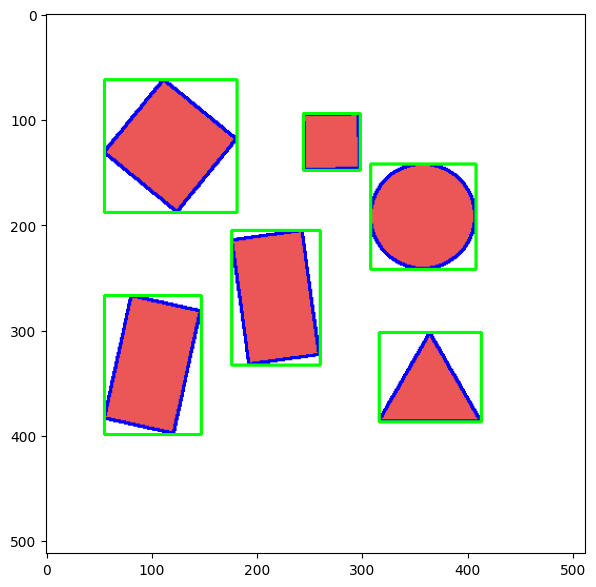

In [35]:
l=[]
for cnt in contours:
  l.append(int(cv2.contourArea(cnt)))
l1=[]
for i in l:
  l1.append(l.index(i))
for i in l1:
  cnt = contours[i]
  x, y, w, h = cv2.boundingRect(cnt)
  img = cv2.drawContours(img, [cnt], 0, (0,0,255), 2)
  img = cv2.rectangle(img, (x, y), (x+w, y+h), (0,255,0), 2)
show(img)